<a href="https://colab.research.google.com/github/Nikita018/Computer-Vision-problems/blob/master/Binary%20Emotion%20Classifier/EmotionClassifier_Happy_and_Sad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

--2020-01-05 00:58:25--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 2a00:1450:4013:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.01s   

2020-01-05 00:58:26 (199 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [0]:
import tensorflow as tf
import os
import zipfile
from os import path, getcwd, chdir

# DO NOT CHANGE THE LINE BELOW. If you are developing in a local
# environment, then grab happy-or-sad.zip from the Coursera Jupyter Notebook
# and place it inside a local folder and edit the path to that location
path = '/tmp/happy-or-sad.zip'

zip_ref = zipfile.ZipFile(path, 'r')
zip_ref.extractall("/tmp/happy-or-sad")
zip_ref.close()

In [0]:
# Directory with our training horse pictures
train_happy_dir = os.path.join('/tmp/happy-or-sad/happy')

# Directory with our training human pictures
train_sad_dir = os.path.join('/tmp/happy-or-sad/sad')


In [0]:
train_happy_names = os.listdir(train_happy_dir)
print(train_happy_names[:10])

train_sad_names = os.listdir(train_sad_dir)
print(train_sad_names[:10])

['happy2-04.png', 'happy1-15.png', 'happy2-07.png', 'happy1-16.png', 'happy1-06.png', 'happy2-02.png', 'happy1-00.png', 'happy1-11.png', 'happy2-15.png', 'happy1-04.png']
['sad1-16.png', 'sad2-05.png', 'sad2-17.png', 'sad1-14.png', 'sad1-02.png', 'sad1-19.png', 'sad1-08.png', 'sad1-07.png', 'sad1-01.png', 'sad1-00.png']


In [0]:
print('total training happy images:', len(os.listdir(train_happy_dir)))
print('total training sad images:', len(os.listdir(train_sad_dir)))

total training happy images: 40
total training sad images: 40


In [0]:
# Lets take a look at a few images

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0# Lets take a look at a few images

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

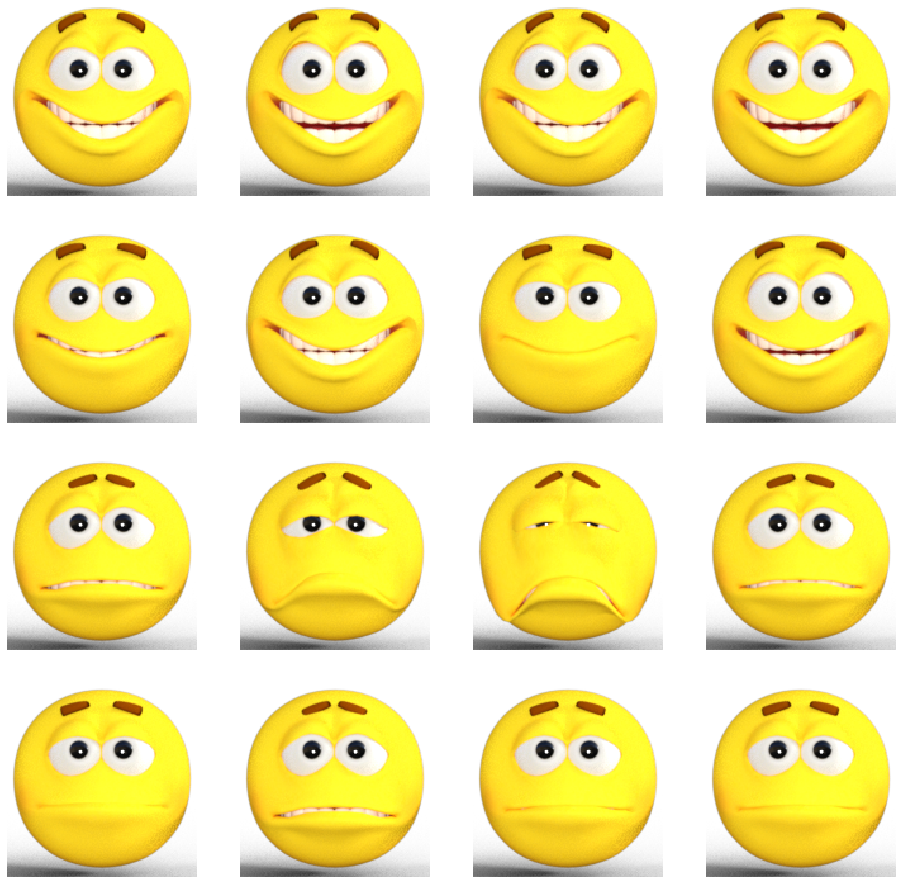

In [0]:
# Display a batch of 8 horse and 8 human pictures

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_happy_pix = [os.path.join(train_happy_dir, fname) 
                for fname in train_happy_names[pic_index-8:pic_index]]
next_sad_pix = [os.path.join(train_sad_dir, fname) 
                for fname in train_sad_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_happy_pix+next_sad_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [0]:
# GRADED FUNCTION: train_happy_sad_model
def train_happy_sad_model():
    # Please write your code only where you are indicated.
    # please do not remove # model fitting inline comments.

    DESIRED_ACCURACY = 0.999

    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
            if(logs.get('acc')>0.999):
                print("\nReached 99.9% accuracy so cancelling training!")
                self.model.stop_training=True

    callbacks = myCallback()
    
    # This Code Block should Define and Compile the Model. Please assume the images are 150 X 150 in your implementation.
    model = tf.keras.models.Sequential([
            # First convolution layer
            tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
            tf.keras.layers.MaxPooling2D(2, 2),
            # Second convolution layer
            tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            # Third convolution layer
            tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    from tensorflow.keras.optimizers import RMSprop

    model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])
        

    # This code block should create an instance of an ImageDataGenerator called train_datagen 
    # And a train_generator by calling train_datagen.flow_from_directory

    from tensorflow.keras.preprocessing.image import ImageDataGenerator

    train_datagen = ImageDataGenerator(rescale=1/255)

    # Please use a target_size of 150 X 150.
    train_generator = train_datagen.flow_from_directory(
       '/tmp/happy-or-sad',
        target_size=(150,150),
        batch_size = 32,
        class_mode='binary')
    # Expected output: 'Found 80 images belonging to 2 classes'

    # This code block should call model.fit_generator and train for
    # a number of epochs.
    # model fitting
    history = model.fit_generator(
          train_generator,
          steps_per_epoch=8,  
          epochs=15,
          verbose=1,callbacks=[callbacks])
    # model fitting
    return history.history['acc'][-1]

In [0]:
# The Expected output: "Reached 99.9% accuracy so cancelling training!""
train_happy_sad_model()

Found 80 images belonging to 2 classes.
Epoch 1/15
8/8 [==============================] - 12s 1s/step - loss: 6.3843 - acc: 0.5192
Epoch 2/15
8/8 [==============================] - 12s 1s/step - loss: 0.5565 - acc: 0.6205
Epoch 3/15
8/8 [==============================] - 11s 1s/step - loss: 0.3845 - acc: 0.8413
Epoch 4/15
8/8 [==============================] - 11s 1s/step - loss: 0.2556 - acc: 0.9183
Epoch 5/15
8/8 [==============================] - 12s 1s/step - loss: 0.1271 - acc: 0.9464
Epoch 6/15
8/8 [==============================] - 11s 1s/step - loss: 0.0904 - acc: 0.9663
Epoch 7/15
8/8 [==============================] - 11s 1s/step - loss: 0.1927 - acc: 0.8990
Epoch 8/15
8/8 [==============================] - 12s 2s/step - loss: 0.2131 - acc: 0.9107
Epoch 9/15
8/8 [==============================] - 11s 1s/step - loss: 0.1574 - acc: 0.9375
Epoch 10/15
8/8 [==============================] - 11s 1s/step - loss: 0.1526 - acc: 0.9567
Epoch 11/15
8/8 [==============================] 

1.0

In [0]:
    model = tf.keras.models.Sequential([
            # First convolution layer
            tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
            tf.keras.layers.MaxPooling2D(2, 2),
            # Second convolution layer
            tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            # Third convolution layer
            tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid')
    ])

In [0]:
 from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [0]:
    from tensorflow.keras.preprocessing.image import ImageDataGenerator

    train_datagen = ImageDataGenerator(rescale=1/255)

    # Please use a target_size of 150 X 150.
    train_generator = train_datagen.flow_from_directory(
       '/tmp/happy-or-sad',
        target_size=(150,150),
        batch_size = 32,
        class_mode='binary')

Found 80 images belonging to 2 classes.


In [0]:
history = model.fit_generator(
          train_generator,
          steps_per_epoch=8,  
          epochs=15,
          verbose=1,)

Epoch 1/15
8/8 [==============================] - 13s 2s/step - loss: 2.6511 - acc: 0.5268
Epoch 2/15
8/8 [==============================] - 11s 1s/step - loss: 0.6642 - acc: 0.5865
Epoch 3/15
8/8 [==============================] - 11s 1s/step - loss: 0.4494 - acc: 0.7837
Epoch 4/15
8/8 [==============================] - 11s 1s/step - loss: 0.2557 - acc: 0.9038
Epoch 5/15
8/8 [==============================] - 11s 1s/step - loss: 0.1368 - acc: 0.9663
Epoch 6/15
8/8 [==============================] - 12s 1s/step - loss: 0.1703 - acc: 0.8884
Epoch 7/15
8/8 [==============================] - 12s 1s/step - loss: 0.1527 - acc: 0.9375
Epoch 8/15
8/8 [==============================] - 10s 1s/step - loss: 0.0302 - acc: 0.9948
Epoch 9/15
8/8 [==============================] - 12s 2s/step - loss: 0.0324 - acc: 0.9866
Epoch 10/15
8/8 [==============================] - 11s 1s/step - loss: 0.0078 - acc: 1.0000
Epoch 11/15
8/8 [==============================] - 12s 1s/step - loss: 0.0040 - acc: 1.00

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()


for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is happy")
  else:
    print(fn + " is sad")

Saving happy1-02.png to happy1-02.png
[0.]
happy1-02.png is sad
